# pythonで解く数理最適化（実践）


### 1.1 最適化問題のクラス

目的関数$f$と実行可能領域$S$を定める制約条件の数学的性質により，<br>
分類することができます．

例えば，変数が全て連続変数（実数値をとるような変数）である場合，<br>
問題のクラス分けは，下の表のようになる．

> | $f$	| $S$ |  問題クラス |
> | :--- : | :---:  |:---:  |
> | 線形 | 線形 | 線形計画問題（LP） |
> |（凸）二次| 線形 | （凸）二次計画問題（QP）|
> ||少なくとも一方が非線形| 非線形計画問題（NLP）|

### 1.2 ソルバを用いた最適化のプロセス
- Step1: 実際の最適化問題として定式化する
- Step2: ソルバと呼ばれるソフトウェアを用いて最適解を得る
- Step3: 数値解を分析する
- Step4: 分析した結果を実問題に適用する

実問題に適用できるように，ぐるぐる繰り返すことが一般的で，<br>
一般的にソルバが読み込める言語の代表的なものとしてAMPLがあります．<br>
定式化した数式をAMPLと呼ばれるプログラミング言語で書き換え，ソルバに食わせるイメージ．<br>
パラメータを記入するデータファイル，モデルを記入するモデルファイルに分けて書くのが一般的です．


## 2. 例題で慣れる

### 2.1 例題1：線形計画問題

> 材料AとBから合成できる化学製品XとYを，たくさん作成したい．<br>
> Xを1kg作るのに必要な量は，Aが1kgでBが3kg である．<br>
> また，Yを1kg作るのに必要な量は，Aが2kgでBが1kgである．<br>
このとき，XもYも1kg当りの価格は100円であるとする．<br>
>
> 一方，現在持ち合わせている材料は，材料Aが16kgで，材料Bが18kgしかない．<br>
> XとYの価格の合計が最大になるようにするには、XとYをどれだけ作成すればよいか求めよ。

#### <定式化 >
- 変数：$x$, $y$ >= 0
- 目的関数：100x + 100y ←　最大化
- 制約条件：x + 2y <= 16
- 制約条件：- 3x + y <= 18
   


#### <pulpで一般的なモデルの書き方>

#### ライブラリのインポート


In [1]:
from pulp import LpProblem, LpMaximize, LpVariable, value

#####  数理モデルの作成


In [ ]:
## 最大化問題
# m = LProblem(sense=LpMaximize)

## 最小化問題
# m = LProblem()

## 複数モデルを作成するなどで、モデルに名前をつける場合
# LpProblem(name='hoge', sense=LpMinimize)


##### 変数の作成

In [ ]:
## 連続の変数
# x = LpVariable("x", lowBound=0) 

## 0-1変数
# x = LpVariable("x", cat=LpBinary) 

## 連続変数のリスト
# x = [LpVariable("x",  lowBound=0) for i in range(n)]

## 0-1変数のリスト
# x = [LpVariable("x", cat=LpBinary) for i in range(n)]

#### 目的関数

In [ ]:
# m += @* x + @*y
#（設定した目的関数は$m.objective$で参照できる）

#### 制約条件

In [5]:
## パターン１
# m += 　式 == 式

##パターン２
# m += 　式 <= 式

## パターン3
# m += 　式 >= 式

## 和を使う式
# from pulp import lpDot, lpSum
# lpSum(変数のリスト)

## 内積を使う式
# from pulp import lpDot, lpSum
# lpDot( 係数のリスト,変数のリスト)

#### ソルバの実行

In [11]:
## ソルバ計算の実行
# m.solve() 

## ステータスの確認方法
# from pulp import LpSatus 
# m.status

## 実行結果の文字列
# LpStatus[m.status]

> | 整数値	| 文字列 |  説明 |
> | :-- | :--  | :--  |
> | 1  | Optimal      | MIp gap内でも厳密解が得られた 
> | -1 | Infeasible   | 実行可能領域が空
> | -2 | Unbounded  | 非有界(いくらでも最適解をよくできる)
> | 0  | Not Solved  | 時間制限でとめたい場合など（実行可能の場合もある）
> | -3 | Undefined   | pulpで判断できない場合

#### ソルバの種類

有償や無償の違いがあるほか，対応している問題クラス（線形問題・非線形問題など）も異なる<br>
(日本の会社（NTTデータ）でもソルバを開発・作成し，商品化しています．)

- 商用のソルバ（FICO, [Gurobi](https://www.octobersky.jp/products/gurobi.html), CPLEX, IPOPT, KNITRO, SNOPTなど）
- 無償提供のソルバ（[GLPK](https://www.gnu.org/software/glpk/),  MIPCL, [SCIP](https://www.scipopt.org/)など)

#### Python で対応しているソルバ

- CBC
    - COINプロジェクトの無償ソルバ
    - 最適化問題を解く際に特に指定しないとデフォルトでこのソルバが使用される
- Gutobi, CPLEX
    - 高性能な商用有償ソルバ
- GLPK
    -  GNU製の無償ソルバ

#### Python でのソルバ指定方法

In [74]:
# --------------------------------------------------------------
## CBC
## 指定する必要なし
# cmd = PULP_CBC_CMD(maxSecond=600, fracGap=0.01, keepFiles=True)
# --------------------------------------------------------------

## Gurobi
# cmd = GUROBI_CMD(maxSecond=600, fracGap=0.01, keepFiles=True)
# m.solve(GUROBI_CMD())

## CPLEX 
# cmd = CPLEX_CMD(maxSecond=600, fracGap=0.01, keepFiles=True)
# m.solve(CPLEX_CMD())

## GLPK
# cmd = GLPK_CMD(maxSecond=600, fracGap=0.01, keepFiles=True)
# m.solve(GLPK_CMD())


#### CBCでのオプション指定
- maxSecond：打切り計算時間を秒で指定する。途中解があれば出力される
- fracGap: 解の良さの指標MIP gapを指定すうる。0.01の場合、以下の計算式の値が-0.01以下になる
     - |得られた解の目的関数の値-厳密解の目的関数の値| / 厳密解の目的関数の値
-  keepFiles: 一時ファイルを削除しない、入出力ファイルを確認したいときにつかう。


In [2]:
## 利用可能なソルバのオブジェクトの確認方法
import pulp
pulp.pulpTestAll()

...............

Solver <class 'pulp.apis.coin_api.PULP_CBC_CMD'> available
Solver <class 'pulp.apis.cplex_api.CPLEX_DLL'> unavailable
Solver <class 'pulp.apis.cplex_api.CPLEX_CMD'> unavailable
Solver <class 'pulp.apis.cplex_api.CPLEX_PY'> unavailable
Solver <class 'pulp.apis.coin_api.COIN_CMD'> available
Solver <class 'pulp.apis.coin_api.COINMP_DLL'> unavailable
Solver <class 'pulp.apis.glpk_api.GLPK_CMD'> available
Solver <class 'pulp.apis.xpress_api.XPRESS'> unavailable
Solver <class 'pulp.apis.gurobi_api.GUROBI'> unavailable
Solver <class 'pulp.apis.gurobi_api.GUROBI_CMD'> unavailable
Solver <class 'pulp.apis.glpk_api.PYGLPK'> unavailable
Solver <class 'pulp.apis.coin_api.YAPOSIB'> unavailable
Solver <class 'pulp.apis.choco_api.PULP_CHOCO_CMD'> available
Solver <class 'pulp.apis.choco_api.CHOCO_CMD'> unavailable
Solver <class 'pulp.apis.mipcl_api.MIPCL_CMD'> unavailable
Solver <class 'pulp.apis.mosek_api.MOSEK'> unavailable
	 Testing continuous LP solution
	 Testing MIP solution
	 Testing maximize 

......./Users/ayaka_yamamoto/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pulp/tests/test_pulp.py:327: UserWarning: CBC gives a wrong solution with mip start.
  warnings.warn("CBC gives a wrong solution with mip start.")
.............


	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP solution
	 Testing MIP solution
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing another integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)

.........


	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
	 Testing continuous LP solution
	 Testing MIP solution
	 Testing maximize continuous LP solution
	 Testing continuous LP solution
	 Testing continuous LP solution


............

	 Testing continuous LP solution
	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective


....../Users/ayaka_yamamoto/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pulp/tests/test_pulp.py:327: UserWarning: CBC gives a wrong solution with mip start.
  warnings.warn("CBC gives a wrong solution with mip start.")
...

	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP solution
	 Testing MIP solution
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)


............

	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing another integer infeasible problem
	 Testing column based modelling
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)


...................

	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
	 Testing continuous LP solution
	 Testing MIP solution
	 Testing maximize continuous LP solution
	 Testing continuous LP solution
	 Testing continuous LP solution
	 Testing continuous LP solution
	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective


........................

	 Testing LpVariable (not LpAffineExpression) objective
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP solution
	 Testing MIP solution
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing another integer infeasible problem
	 Testing column based modelling
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
	 Testing continuous LP solution


.

	 Testing MIP solution


.

	 Testing maximize continuous LP solution


.

	 Testing continuous LP solution


.

	 Testing continuous LP solution


.

	 Testing continuous LP solution


.....

	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution


.

	 Testing maximize continuous LP solution


..

	 Testing unbounded continuous LP solution
	 Testing Long Names


..

	 Testing repeated Names
	 Testing zero constraint


.

	 Testing zero objective


.

	 Testing LpVariable (not LpAffineExpression) objective


..

	 Testing LpAffineExpression divide


.

	 Testing MIP solution


.

	 Testing MIP solution with floats in objective


.

	 Testing MIP solution


.

	 Testing MIP solution


./Users/ayaka_yamamoto/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pulp/apis/choco_api.py:71: UserWarning: CHOCO_CMD cannot solve the relaxation of a problem
  warnings.warn("CHOCO_CMD cannot solve the relaxation of a problem")


	 Testing MIP relaxation


.

	 Testing feasibility problem (no objective)


.

	 Testing an infeasible problem


.

	 Testing an integer infeasible problem


.

	 Testing another integer infeasible problem


.

	 Testing column based modelling


.....

	 Testing fractional constraints


.

	 Testing elastic constraints (no change)


.

	 Testing elastic constraints (freebound)


.

	 Testing elastic constraints (penalty unchanged)


.............................

	 Testing elastic constraints (penalty unbounded)
{'a': 53.0, 'b': 45.3, 'c': 459.2}


.................
----------------------------------------------------------------------
Ran 203 tests in 20.499s

OK



#### 変数や式や目的関数の値

In [45]:
# print(value(x), value(y))

## 一般の変数や式や目的関数の値は、以下のようにして確認可能
#  value(変数)
#  value(式)
#  value(m.objective)

#### <puplモデル作成（実践）>

In [3]:
# パッケージ
from pulp import *

# 数理モデルの作成
m = LpProblem("test1_LpProblem", sense=LpMaximize) 

# 変数の作成
x = LpVariable('x', lowBound=0)  # x>=0
y = LpVariable('y', lowBound=0)  # y>=0

# 目的関数の設定
m += 100 * x + 100 * y 

# 制約条件の設定
m += x + 2 * y <= 16 
m += 3 * x + y <= 18 

# ソルバの指定、オプションの指定
cmd = GLPK_CMD(maxSecond=600, gapRel=0.01, keepFiles=True)

# ソルバで計算する
try:
    m.solve(cmd)
    print('Status num.: ', m.status) 
    print('Status: ', LpStatus[m.status])
except PulpSolverError as e:
    print(e)

Status num.:  1
Status:  Optimal


In [4]:
# 解をoutput
print('x=',value(x))
print('y=',value(y))
print('Optimal val.=',value(m.objective))

x= 4.0
y= 6.0
Optimal val.= 1000.0


In [5]:
# モデルを出力することも可能
m.writeLP("test1_LpProblem.lp")
#m.write("LpProblem.mps")
print('lp file =========================')
!cat test1_LpProblem.lp

lp file =========================
\* test1_LpProblem *\
Maximize
OBJ: 100 x + 100 y
Subject To
_C1: x + 2 y <= 16
_C2: 3 x + y <= 18
End


In [6]:
m.writeMPS("test1_LpProblem.mps")
print('MPS file =========================')
!cat test1_LpProblem.mps

MPS file =========================
*SENSE:Maximize
NAME          test1_LpProblem
ROWS
 N  OBJ
 L  _C1
 L  _C2
COLUMNS
    x         _C1        1.000000000000e+00
    x         _C2        3.000000000000e+00
    x         OBJ        1.000000000000e+02
    y         _C1        2.000000000000e+00
    y         _C2        1.000000000000e+00
    y         OBJ        1.000000000000e+02
RHS
    RHS       _C1        1.600000000000e+01
    RHS       _C2        1.800000000000e+01
BOUNDS
ENDATA


#### チートシート

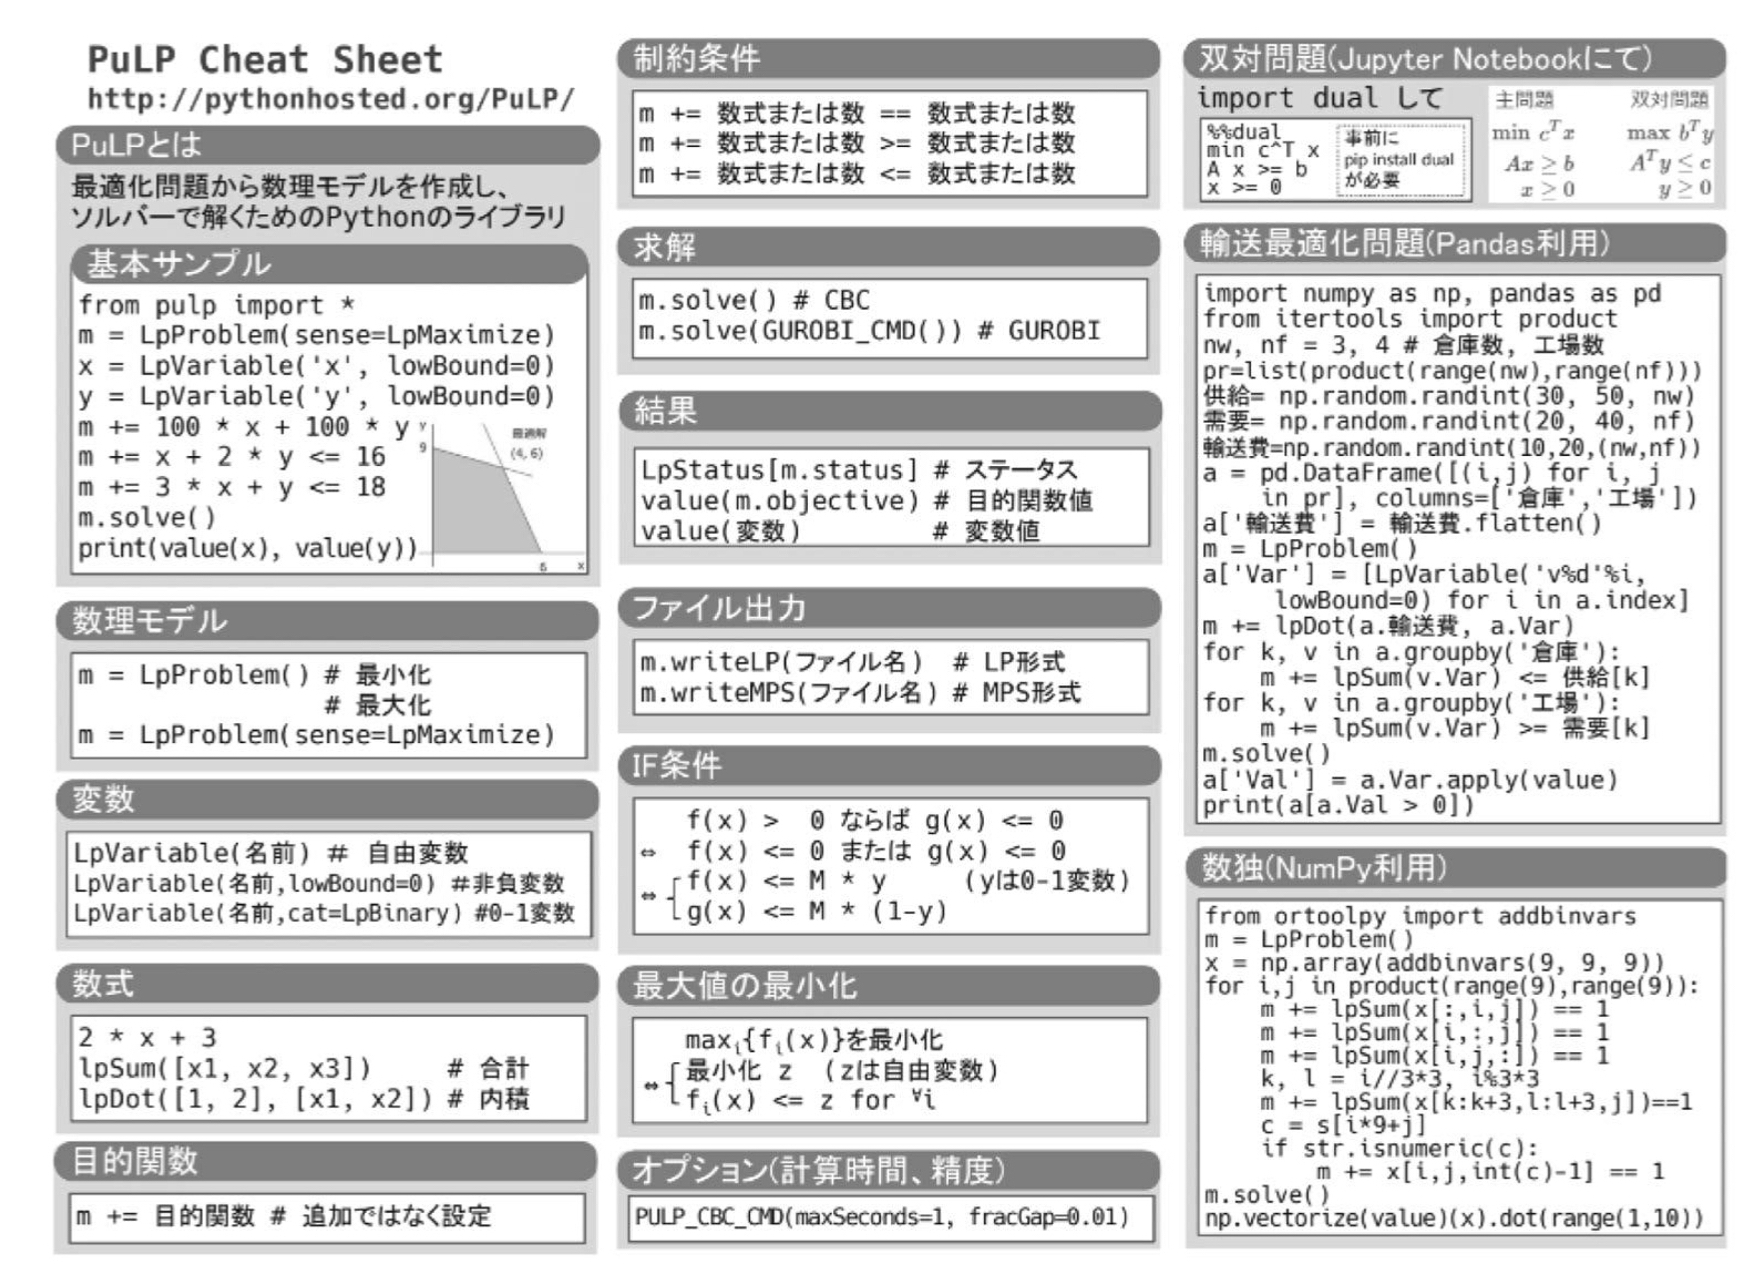

---
### 2.2 例題2：ナップザック問題

> ある泥棒が，ある家に進入した． <br>
> 準備したカバンにできるだけ価値のあるお宝をたくさんつめて帰りたい．<br>
> ある家には，お宝は全部で5個ある．<br>
> それぞれのお宝の重さと価値は以下の表の通りである．<br>
> 急いで，ダイソーでカバンを買ったため，耐えられる重さは15kgと記載されている．<br>
> さて，どれをつめて帰れば，一番儲かるのか考えよう．<br>
>
> | お宝	| 価値 | 重さ |
> | :--- :  | :---: | :---: |
> | A | 4 | 12| 
> | B | 2 |2|
> | C | 2 | 1 |
> | D | 1 | 1 |
> | E | 10 | 4 |


#### <記号の定義 >
- 集合
    - $i$: お宝の集合
- 変数
    - $x_{i}$: お宝をカバンにつめるとき1,つめないとき０を意味する0-1変数
- パラメータ
    - $w_{i}$： お宝$i$の重さ
    - $v_{i}$： お宝$i$の価値
    - $W$: カバンの耐えれる重さ

#### <定式化>
maximize: 
$
\sum_{i \in I} v_{i}  x_{i}
$


subject to: 
$
\sum_{i \in I} w_{i} x_{i} \le W\\
x_{i}\in \{0, 1\}   \quad (i \in I)
$


#### <pulpでモデル作成>

In [14]:
# パッケージ
from pulp import *

# 数理モデルのクラスの定義
m = LpProblem("test2_napzack", sense=LpMaximize) 

# パラメータの設定
I = ["A", "B","C", "D", "E"] # お宝
w = [4, 2, 2, 1, 10]             # 重さ
v  = [12, 2, 1, 1, 4]             # 価値
W = 15                                  # カバンの耐えれる重さ

# 変数の定義
x = [LpVariable(f'x{i}', cat=LpBinary) for i in I]

# 目的関数
m += lpDot(v, x)

# 制約条件
m += lpDot(w, x) <= W 

# ソルバの指定、オプションの指定
cmd = GLPK_CMD(maxSecond=600, gapRel=0.01, keepFiles=True)

# ソルバで計算する
try:
    m.solve(cmd)
    print('Status num.: ', m.status) 
    print('Status: ', LpStatus[m.status])
except PulpSolverError as e:
    print(e)
print("----------------------")


# 解をoutput
print('Optimal val.=',value(m.objective)) 
for i in x:
    print(i.name, pulp.value(i))

# 必要な解だけ
print("----------------------")
print('カバンにつめるお宝：　', [i for i in n if value(x[i]) > 0.5])

    

Status num.:  1
Status:  Optimal
----------------------
Optimal val.= 17
xA 1
xB 0
xC 0
xD 1
xE 1
----------------------
カバンにつめるお宝：　 [0, 3, 4]


---
### 2.2 例題3：整数計画問題1（整数変数をもつ問題）

> ある会社で働くYさんは， コロナの影響で「雑誌のお金が高い」と部長から怒られた．<br>
> 来年度に向けて，雑誌の選別をしないといけないが，どうすればいいか頭をかかえていた．<br>
> もちろん，雑誌の予算がカットされることから， <br>
> これまで購入してきた18雑誌のうち，いくつかの雑誌の購読を中止して，数を絞りたい．<br>
> 
> そこで，会社のメンバーにslackのpollyを使用してアンケートで希望度を調査した．<br>
> その希望度及び，価格は表の通りとなった．<br>
> 
> 予算が100のとき，希望度合計を最大にするように購読雑誌を選定する．<br>
>
>     
> |雑誌名	|A	|B	|C	|D	|E	|F	|G	|H	|I     |J	|K	|L	| M	|N	|O	|P	|Q	|R      |
> | :---     | :---:  |:---:   | :---:  | :---:  |:---:   | :---:  | :---:  |:---:   | :---: | :---:  | :---:  |:---:   | :---:  | :---:  |:---:   | :---:  | :---:  |:---:   | 
> |希望度  | 9	 |3	|3	|1	|10	|7	|10	|0	|1     |1	|6	|3	|5	|0	|2	|15	|3	|0      | 
> |価格    | 2  |13	|13	|15	|20	|10	|12	|3	|10    |7	|5	|8	|10	|15	|5	|16|5	|4      |


#### <記号の定義>
- 集合
    - $i$: 雑誌の集合
- パラメータ
    - $b_{i}$: 雑誌$i$の希望度 
    - $c_{i}$: 雑誌$i$の価格 
    - $A$: 考えている予算
- 変数
    - $x_{i}$: 雑誌$i$を購入するか・しないかの有無を表す0-1変数


#### <定式化>
maximize
$
\sum_{i \in I}  b_{i}* x_{i} 
$


subject to
$
\sum_{i \in I } c_{i} * x_{i} \le A \\
x_{i} \in \{0, 1\}   \quad (i \in I)
$


#### <pulpでモデル作成>

In [49]:
# パッケージのインストール
from pulp import *

# 数理モデルの作成
m = LpProblem("test3_magazine", sense=LpMaximize) 

# パラメータの設定
I = ["A", "B","C", "D", "E","F","G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R" ] # 雑誌
b =[9, 3, 3, 1, 10, 7, 10, 0, 1, 1, 6, 3, 5, 0, 2, 15, 3, 0]           # 希望度
c =[2,13, 13, 15, 20, 10, 12, 3, 10, 7, 5, 8,10, 5, 5, 16, 5, 4]  # 金額
A = 100 # 予算の上限

# 変数の定義
x = [LpVariable(f'x{i}', cat=LpBinary) for i in I]

# 目的関数
m += lpDot(b, x)

# 制約条件
m += lpDot(c, x) <= A
# 予算の出力
budget = lpDot(c, x) 

# ソルバの指定、オプションの指定
cmd = GLPK_CMD(maxSecond=600, gapRel=0.01, keepFiles=True)

# ソルバで計算する
try:
    # 文頭に"%time"をつけると時間が計算できる
    %time m.solve(cmd)
    print('Status num.: ', m.status) 
    print('Status: ', LpStatus[m.status])
except PulpSolverError as e:
    print(e)
print("----------------------")


# 解をoutput
print('Optimal val.=',value(m.objective)) 
for i in x:
    print(i.name, pulp.value(i))

# 必要な解だけ
print("----------------------")
print('採用する雑誌：　', [i for i in n if value(x[i]) > 0.5])
print("実際の金額", value(budget))


CPU times: user 1.44 ms, sys: 3.51 ms, total: 4.95 ms
Wall time: 15 ms
Status num.:  1
Status:  Optimal
----------------------
Optimal val.= 71
xA 1
xB 0
xC 0
xD 0
xE 1
xF 1
xG 1
xH 0
xI 0
xJ 1
xK 1
xL 1
xM 1
xN 0
xO 1
xP 1
xQ 1
xR 0
----------------------


NameError: name 'n' is not defined


### 3 オリジナル問題に取り組んでみる

### 3.1 例題オリジナル：DS課のシフト

>　問題文かく



#### <記号の定義>
- 集合
    - $I$: 人の集合
    - $I'$: PGMの集合
    - $J$: 曜日の集合
    - $J'$: 土曜と日曜の集合
    
- パラメータ
    - $s_{i j}$: 人$i$さんが$j$曜日に働けるとき１、働けないとき０を表す0-1変数
- 変数
    - $x_{ij}$: 人$i$さんが$j$曜日に働くとき１、働かないとき０
    - $u$:シフト希望が通る回数の上限（最大値）
    - $l$: シフト希望が通る回数の上限（最小値）


#### <目的関数>

##### シフト希望が通った回数の隔たりを最小にする
$
u  - l ; 
$

#### <制約条件>


##### １日少なくとも2人は働く
$
\sum_{i \in I} x_{i, j} >= 2; \quad (j \in J)\\
$

##### １日多くても4人まで働ける
$
\sum_{i \in I} x_{i, j} <= 4; \quad (j \in J)\\
$

##### ただし、土曜と日曜は3人以上が働く
$
\sum_{i \in I} x_{i, j} <= 3; \quad (j \in J : s.t j \in J')\\
$

##### １日少なくともPGMは1人いる
$
\sum_{i \in I: s.t i \in I'} x_{i, j} >= 1; \quad (j \in J)\\
$

##### 少なくともシフト希望が通る下限
$
\sum_{j \in J} x_{i, j} >= l ; \quad(i \in I)\\
$

##### 少なくともシフト希望が通る上限
$
\sum_{j \in J} x_{i, j} <= u; \quad(i \in I)\\
$

##### シフト希望日以外は出勤しない
$
	 (s_{i, j} - x_{i, j}) >= 0; \quad(i \in I, j \in J )\\
$



In [1]:
# パッケージのインストール
from pulp import *
import numpy as np
from itertools import product
import pandas as pd
from ortoolpy import addvars
import time
import codecs
import os

### エクセルの読み込み
df = pd.read_csv("2021_02_04_最適化問題_先端DSシフトスケジュール問題.csv", index_col=0)

#### 数理モデルの作成
m = LpProblem("original_DS_ShiftSche") 

#### csvデータから読み込み
# 人の集合
I = df.index.values.tolist()
# PGMの集合
I_ = I[8:11]

# 曜日の集合
J = df.columns.tolist()
# 祝日の集合
#J_ = ['Sat', 'Sun']
J_ = J[5:7]

# 提出したシフトの読み込み
shift = df.values.tolist()

In [16]:
import plotly.express as px

#st.line_chart(shiftcount)
#st.write(shiftcount.plot.bar())
px.bar(df)

In [7]:
a =

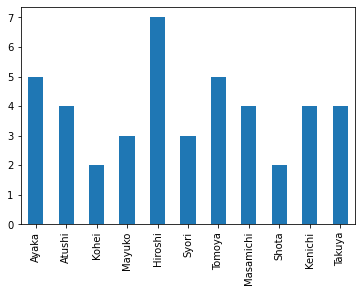

In [10]:
a.plot.bar()

In [214]:
s = {} # 空の辞書
for i in I:
    for j in J:
        s[i, j] = shift[I.index(i)][J.index(j)]
        

### 変数の定義
up = LpVariable("u", lowBound=0) 
low  = LpVariable("l", lowBound=0) 

x = {}
for i in I:
    for j in J:
        x[i, j] = LpVariable(f"x({i},{j})", cat=LpBinary)

        
#### 目的関数
m += (up - low)

#### 制約条件
for j in J:
    # １日少なくとも2人は出勤、多くても4人まで
    m += lpSum(x[i, j] for i in I) >= 1, f"LB_shift_{j}"
    m += lpSum(x[i, j] for i in I) <= 3, f"UB_shift_{j}"
   # PGMは少なくとも1人毎日出勤する
    m += lpSum(x[i, j] for i in I_) >= 1,  f"PGM_shift_commit_{j}"

# 土日は3人以上出勤する
for j in J_ :
    m += lpSum(x[i, j] for i in I) >= 3,  f"LB_shift_SunSat_{j}"

# シフト希望が通る回数の下限と上限
for i in I:
    m += lpSum(x[i, j] for j in J) >= low  , f"LB_Staff_Satisfy_{i}"
    m += lpSum(x[i, j] for j in J) <= up  ,   f"UB_Staff_Satisfy_{i}"
    
# シフト希望日以外は出勤しない
for i in I:
    for j in J:
        m += s[i, j] >= x[i, j],  f"Shift_({i}{j})"


In [215]:
#### ソルバの指定、オプションの指定
cmd = GLPK_CMD(maxSecond=600, gapRel=0.01, keepFiles=True)


#### 時間計測開始
time_start = time.perf_counter()

#### ソルバで計算する
try:
    # 文頭に"%time"をつけると時間が計算できる
    m.solve(cmd)
    print(f"*" * 20)
    print("解の情報")
    print(f"*" * 20)
    print('Status num.: ', m.status) 
    print('Status: ', LpStatus[m.status])
except PulpSolverError as e:
    print(e)

#### 時間計測終了
time_stop = time.perf_counter()
print(f"calc. time = {time_stop - time_start:.3f} (秒)")


********************
解の情報
********************
Status num.:  1
Status:  Optimal
calc. time = 0.407 (秒)


In [216]:
#### 解をoutput
print(f"*" * 20)
print("目的関数値")
print(f"*" * 20)
print('Optimal val.=',value(m.objective)) 

print(f"*" * 20)
print("変数値")
print(f"*" * 20)
print('u=',value(up))
print('l=',value(low))


# 変数の出力
#print("-------x=0, 1すべて---------------------")
#for i in I:
#    for j in J:
#        print(f"{x[i,j].name} = {x[i,j].value()},  ", end=" ")
#    print("")
        
        
# 必要な解だけ
for i in I:
    for j in J:
        if x[i, j].value() == 1:
            print(f"{x[i,j].name} = {x[i,j].value()},  ", end="")
    print("")

# 値だけ
print(f"*" * 10)

os.remove("tmp.txt")
with open("tmp.txt", "a", newline="") as file:
    for i in I:
        for j in J:            
            print(x[i,j].value(), file=file, end="\n")
            print(f"{x[i,j].value()},  ", end="")    
        print("\n")
#        print(" ", file=file) #一行ごとにプリント
#        print(f"{i, j, x[i,j].value()},  ", end=" ")    
#        print(i, j, x[i,j].value())  

********************
目的関数値
********************
Optimal val.= 2.0
********************
変数値
********************
u= 3.0
l= 1.0
x(Ayaka,Wed) = 1,  
x(Atushi,Mon) = 1,  x(Atushi,Sun) = 1,  
x(Kohei,Tue) = 1,  x(Kohei,Thu) = 1,  
x(Mayuko,Mon) = 1,  x(Mayuko,Fri) = 1,  
x(Hiroshi,Thu) = 1,  
x(Syori,Fri) = 1,  x(Syori,Sat) = 1,  
x(Tomoya,Wed) = 1,  x(Tomoya,Sat) = 1,  
x(Masamichi,Sun) = 1,  
x(Shota,Sat) = 1,  x(Shota,Sun) = 1,  
x(Kenichi,Mon) = 1,  x(Kenichi,Tue) = 1,  x(Kenichi,Thu) = 1,  
x(Takuya,Wed) = 1,  x(Takuya,Fri) = 1,  
**********
0,  0,  1,  0,  0,  0,  0,  

1,  0,  0,  0,  0,  0,  1,  

0,  1,  0,  1,  0,  0,  0,  

1,  0,  0,  0,  1,  0,  0,  

0,  0,  0,  1,  0,  0,  0,  

0,  0,  0,  0,  1,  1,  0,  

0,  0,  1,  0,  0,  1,  0,  

0,  0,  0,  0,  0,  0,  1,  

0,  0,  0,  0,  0,  1,  1,  

1,  1,  0,  1,  0,  0,  0,  

0,  0,  1,  0,  1,  0,  0,  



In [173]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import openpyxl
import time
import re
import glob
import pandas as pd
import os
import shutil

book = openpyxl.load_workbook('./temp_schedule.xlsx', data_only = False)
sheet = book['result']

# テキストファイルの読み込み
file_data = open("./tmp.txt", "r", encoding="utf-8")
for j in range(2, 13):   
    for i in range(2, 9):
        pattern_data = file_data.readline().rstrip()

        # エラー処理（ファイルが空の場合はskipする）
        try:
            sheet.cell(row=j, column=i).value = str(pattern_data)
#            sheet['B' + str(row)].value = str(pattern_data)
        except :
            continue
            
    # ファイル出力
    filename, file_extension = os.path.splitext("./tmp.txt")
    out_file =  filename + ".xlsx"
    book.save(out_file)

df_out = pd.read_excel('./tmp.xlsx')
print(df_out)


   Unnamed: 0  Mon  Tue  Wed  Thu  Fri  Sat  Sun
0       Ayaka    1    1    0    0    0    0    0
1      Atushi    1    0    0    0    1    0    1
2       Kohei    0    1    0    1    0    0    0
3      Mayuko    1    0    1    0    0    0    0
4     Hiroshi    0    0    0    1    0    1    0
5       Syori    0    0    0    0    0    1    1
6      Tomoya    0    0    0    1    0    1    0
7   Masamichi    0    1    1    0    0    0    0
8       Shota    0    0    0    0    0    1    1
9     Kenichi    1    1    1    0    0    0    0
10     Takuya    0    0    0    1    1    0    1


#### pandasをうまく利用する

In [163]:
df_out = pd.read_excel('./tmp.xlsx')


In [153]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import openpyxl
import time
import re
import glob
import pandas as pd
import os
import shutil

book = pd.read_csv("./temp_schedule.xlsx")
#book = openpyxl.load_workbook('./temp_schedule.xlsx', data_only = False)
#sheet = book['result']

# テキストファイルの読み込み
for file in glob.glob("./tmp.txt"):
    file_data = open(file, "r", encoding="utf-8")

    for row in range(2, sheet.max_row + 1):    
        pattern_data = file_data.readline().rstrip()

        # エラー処理（ファイルが空の場合はskipする）
        try:
            sheet['B' + str(row)].value = str(pattern_data)
        except :
            continue
            
    # ファイル出力
    filename, file_extension = os.path.splitext(file)
    out_file =  filename + ".xlsx"
    book.save(out_file)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 0-1: invalid continuation byte

In [82]:
! glpsol  -m DS_shift_sche.mod  -d DS_shift_sche.dat  -o DS_shift_sche_result.txt --log DS_shift_sche_log.txt 

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 -m DS_shift_sche.mod -d DS_shift_sche.dat -o DS_shift_sche_result.txt --log
 DS_shift_sche_log.txt
Reading model section from DS_shift_sche.mod...
DS_shift_sche.mod:55: warning: unexpected end of file; missing end statement inserted
55 lines were read
Reading data section from DS_shift_sche.dat...
DS_shift_sche.dat:23: warning: unexpected end of file; missing end statement inserted
23 lines were read
Generating Objective...
Generating LB_shift...
Generating UB_shift...
Generating LB_shift_SunSat...
Generating PGM_shift_commit...
Generating LB_Staff_Satisfy...
Generating UB_Staff_Satisfy...
Generating Shift...
Model has been successfully generated
GLPK Integer Optimizer, v4.65
123 rows, 79 columns, 452 non-zeros
77 integer variables, all of which are binary
Preprocessing...
4 hidden packing inequaliti(es) were detected
37 rows, 41 columns, 183 non-zeros
39 integer variables, all of which are binary
Scaling...

In [83]:
!grep -e "x\[.*\] *\* *1" DS_shift_sche_result.txt 

     1 x[Ayaka,Mon] *              1             0             1 
     5 x[Mayuk,Mon] *              1             0             1 
     7 x[Kenic,Mon] *              1             0             1 
    11 x[Masam,Mon] *              1             0             1 
    12 x[Ayaka,Tue] *              1             0             1 
    14 x[Kohei,Tue] *              1             0             1 
    18 x[Kenic,Tue] *              1             0             1 
    21 x[Tomoy,Tue] *              1             0             1 
    31 x[Takuy,Wed] *              1             0             1 
    32 x[Tomoy,Wed] *              1             0             1 
    33 x[Masam,Wed] *              1             0             1 
    34 x[Ayaka,Thu] *              1             0             1 
    36 x[Kohei,Thu] *              1             0             1 
    40 x[Kenic,Thu] *              1             0             1 
    42 x[Takuy,Thu] *              1             0             1 
    46 x[A